In [1]:
from matplotlib import gridspec
from datetime import datetime
from ipywidgets import fixed
from tabulate import tabulate
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
import tqdm
import ipywidgets as widgets
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
df = pd.read_csv('kc_house_data.csv')
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.00,3,2.50,1530,1131,3.00,0,0,...,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,20150223T000000,400000.00,4,2.50,2310,5813,2.00,0,0,...,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,20140623T000000,402101.00,2,0.75,1020,1350,2.00,0,0,...,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,20150116T000000,400000.00,3,2.50,1600,2388,2.00,0,0,...,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


In [4]:
df.dtypes


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
df['date'] = pd.to_datetime(df['date']) 
df['price'] = df['price'].astype(int)

In [6]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000,3,2.50,1530,1131,3.00,0,0,...,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,2015-02-23,400000,4,2.50,2310,5813,2.00,0,0,...,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,2014-06-23,402101,2,0.75,1020,1350,2.00,0,0,...,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,2015-01-16,400000,3,2.50,1600,2388,2.00,0,0,...,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


In [7]:
df = df.copy()

# INSIGHTS

# H1: Imóveis com vista para a água são em média 30% mais caros

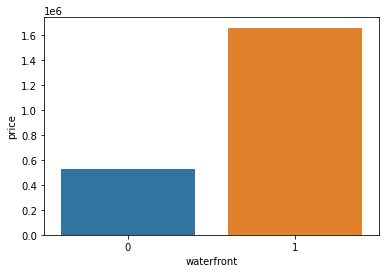

In [8]:
h1 = df[['price', 'waterfront']].groupby('waterfront').mean().reset_index()

h1['waterfront'] = h1['waterfront'].astype(str)

sns.barplot(x = 'waterfront', y = 'price', data = h1);


# H2: Imóveis com data de construção menor que 1955 são em média 50% mais baratos.

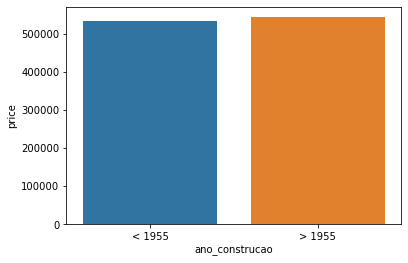

In [9]:
df['ano_construcao'] = df['yr_built'].apply(lambda x: '> 1955' if x > 1955
                                                               else '< 1955')
h2 = df[['ano_construcao', 'price']].groupby('ano_construcao').mean().reset_index()

sns.barplot(x = 'ano_construcao', y = 'price', data = h2);



# H3: Imóveis sem porão possuem área total (sqrt_lot) são 40% maiores do que imóveis com porões.

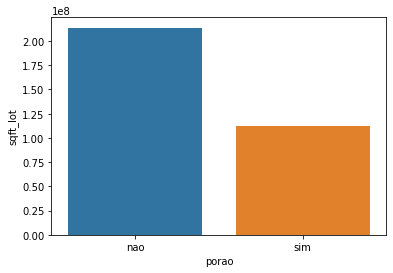

In [10]:
df['porao'] = df['sqft_basement'].apply(lambda x: 'nao' if x == 0
                                                  else 'sim')
h3 = df[['porao', 'sqft_lot', 'price']].groupby('porao').sum().reset_index()

h3
sns.barplot(x = 'porao', y = 'sqft_lot', data = h3);


# H4: O crescimento do preço dos imóveis ano após ano (YoY) é de 10%


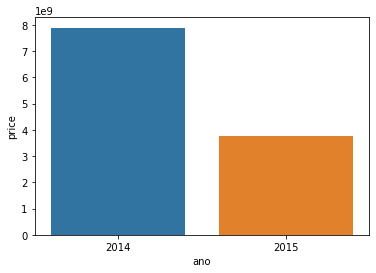

In [11]:
df['ano'] = df['date'].dt.year
h4 = df[['price', 'ano']].groupby('ano').sum().reset_index()

h4['ano'] = h4['ano'].astype(str)

sns.barplot(x = 'ano', y = 'price', data = h4);
           

# H5: Imóveis com 3 banheiros tem um crescimento mês após mês (MoM) de 15%.

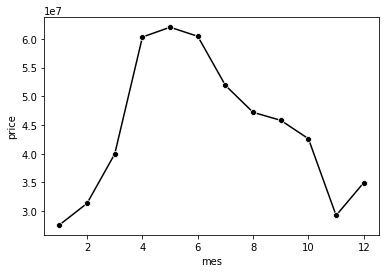

In [12]:
df['mes'] = df['date'].dt.month
h5 = df[(df['bathrooms'] == 3)]

h5 = h5[['mes', 'price']].groupby('mes').sum().reset_index()


sns.lineplot(data = h5, x = 'mes', y = 'price', markers = True, style = (1), legend = False, color = 'black');

# H6: Imóveis com mais banheiros são em média 5% mais caros.

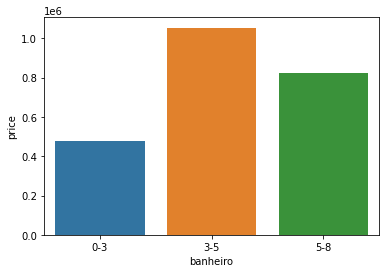

In [13]:
df['banheiro'] =  df['bathrooms'].apply(lambda x: '0-3' if (x > 0 ) & (x < 3) else
                                                   '3-5' if (x > 3) & (x < 5) else
                                                   '5-8')
h6 = df[['banheiro', 'price', 'sqft_lot']].groupby('banheiro').mean().reset_index()

sns.barplot(x = 'banheiro', y = 'price', data = h6);

# H7: O crescimento do preço dos imóveis MoM é de 10%

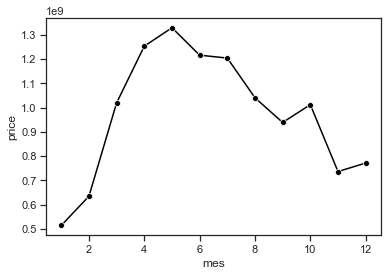

In [14]:
df['mes'] = df['date'].dt.month
df['ano'] = df['date'].dt.year
h41 =  df[['mes', 'price']].groupby('mes').sum().reset_index()

sns.set_theme(style="ticks")
sns.set_context('notebook')
sns.lineplot(data = h41, x = 'mes',  y = 'price', 
             markers = True, style = (1), legend = False, 
             color = 'black');

# Respondendo as questões de negócio

# Quais são os imóveis que a House Rocket deveria comprar e por qual preço?

In [43]:
df = df.copy()
m = df[['zipcode', 'price']].groupby('zipcode').median().reset_index()


df2 = pd.merge(m, df, on='zipcode', how = 'inner')


df2 = df2.rename(columns = {'price_y' : 'price', 'price_x' : 'price_median'} ) 

for i, row in df2.iterrows():
    if (row['price_median'] >= row['price']) & (row['condition'] >= 2):
        df2.loc[i,'pay'] =  'sim'
    else:
        df2.loc[i, 'pay'] = 'nao'

compra = df2[df2['pay'] == 'sim']

compra['pay'].shape[0]
compra[['id', 'price', 'pay']]

,id,price,pay
0,7895500070,240000,sim
5,3353400435,230000,sim
6,9262800171,252000,sim
7,3353401710,227950,sim
8,8159610030,196000,sim
...,...,...,...
21606,2771604196,465000,sim
21607,2770601457,542300,sim
21608,2770601912,570000,sim
21611,2770601782,453000,sim


In [44]:
fil_zip = widgets.Dropdown(options = df2['pay'].unique().tolist(),
                       description = 'regiao',
                       disabled = False)


def  update_map (df3, fil_zip):
    house = df2[(df2['pay'] == fil_zip)][['id', 'lat', 'long', 'condition', 'pay', 'price']] 

    mapa = px.scatter_mapbox(house, lat = 'lat', lon = 'long',  
                         size = 'price',
                         color = 'condition', opacity = 0.5, zoom = 10 )
    

    mapa.update_layout( mapbox_style = 'open-street-map')
    mapa.update_layout( height = 600, margin = {'b':0, 't':0, 'r':0, 'l': 0})
    mapa.show()
    




In [45]:
widgets.interactive( update_map, df3 = fixed(df2), fil_zip  = fil_zip) 

interactive(children=(Dropdown(description='regiao', options=('sim', 'nao'), value='sim'), Output()), _dom_cla…

# Uma vez comprado, qual é o melhor momento para vendê-lo e por qual preço?

In [46]:
        
df2['season'] = df2['mes'].apply(lambda x: 'summer' if (x > 5) & (x <= 8) else
                                           'spring' if (x > 2) & (x <= 5) else
                                           'fall' if (x > 8) & (x < 12) else
                                           'winter') 


In [47]:
df3 = df2.copy()


df3 = df3[df3['pay'] == 'sim']

df4 = df3[['season', 'zipcode', 'price']].groupby(['zipcode', 'season']).median().reset_index()

df4 = df4.rename(columns = {'price' : 'price_medi_season', 'season': 'season_median'} ) 

df5 = pd.merge(df3, df4, on='zipcode', how = 'inner')

for i, row in df5.iterrows():
    if (row['price_medi_season'] > row['price']):
        df5.loc[i, 'sale'] =  row['price'] * 1.3
    else:
        df5.loc[i, 'sale'] = row['price'] * 1.1


In [49]:
df5

,zipcode,price_median,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,ano_construcao,porao,ano,mes,banheiro,pay,season,season_median,price_medi_season,sale
0,98001,260000.00,7895500070,2015-02-13,240000,4,1.00,1220,8075,1.00,...,> 1955,sim,2015,2,0-3,sim,winter,fall,215500.00,264000.00
1,98001,260000.00,7895500070,2015-02-13,240000,4,1.00,1220,8075,1.00,...,> 1955,sim,2015,2,0-3,sim,winter,spring,210500.00,264000.00
2,98001,260000.00,7895500070,2015-02-13,240000,4,1.00,1220,8075,1.00,...,> 1955,sim,2015,2,0-3,sim,winter,summer,213300.00,264000.00
3,98001,260000.00,7895500070,2015-02-13,240000,4,1.00,1220,8075,1.00,...,> 1955,sim,2015,2,0-3,sim,winter,winter,233975.00,264000.00
4,98001,260000.00,3353400435,2014-07-21,230000,3,2.00,1450,11204,1.00,...,> 1955,nao,2014,7,0-3,sim,summer,fall,215500.00,253000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43443,98199,689800.00,2770601782,2014-08-01,453000,3,2.50,1510,1618,2.50,...,> 1955,sim,2014,8,0-3,sim,summer,winter,565000.00,588900.00
43444,98199,689800.00,6821101731,2014-09-30,549000,3,2.25,1230,1380,3.00,...,> 1955,nao,2014,9,0-3,sim,fall,fall,511200.00,603900.00
43445,98199,689800.00,6821101731,2014-09-30,549000,3,2.25,1230,1380,3.00,...,> 1955,nao,2014,9,0-3,sim,fall,spring,543115.00,603900.00
43446,98199,689800.00,6821101731,2014-09-30,549000,3,2.25,1230,1380,3.00,...,> 1955,nao,2014,9,0-3,sim,fall,summer,524999.50,603900.00


In [50]:
lista2 = df5['season'].tolist()
df5[['season', 'price', 'id', 'sale']]

,season,price,id,sale
0,winter,240000,7895500070,264000.00
1,winter,240000,7895500070,264000.00
2,winter,240000,7895500070,264000.00
3,winter,240000,7895500070,264000.00
4,summer,230000,3353400435,253000.00
...,...,...,...,...
43443,summer,453000,2770601782,588900.00
43444,fall,549000,6821101731,603900.00
43445,fall,549000,6821101731,603900.00
43446,fall,549000,6821101731,603900.00


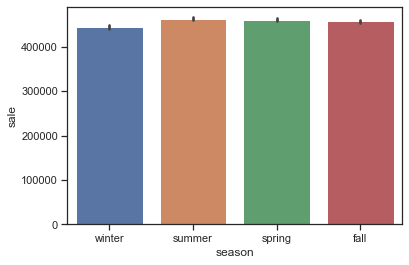

In [51]:
n = df5[['price_medi_season', 'price', 'sale', 'price_median', 'season', 'zipcode']]
n
sns.barplot(data = n, x = 'season', y = 'sale');

# Resultado

In [52]:
df5 ['lucro'] = df5['sale'] - df5['price']
df5['lucro'].sum()

3105165061.0000005